In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
data = np.load('2M_32k_counter_data_20191113_211305.npz')
counts_2M, counts_32k = data['counts_2M'], data['counts_32k']
raw_ratios = counts_2M / counts_32k

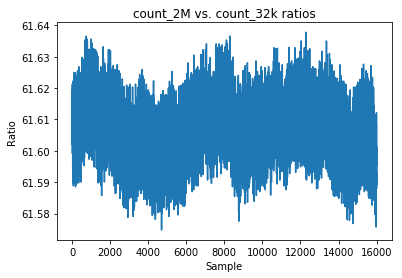

In [3]:
plt.plot(raw_ratios[:16000])
plt.title('count_2M vs. count_32k ratios')
plt.xlabel('Sample')
plt.ylabel('Ratio')
plt.show()

In [4]:
avg_counts = np.arange(1, 1001)
ratios = raw_ratios[:16000]

def mean_stddev_after_averaging(avg_count):
    num_bins = len(ratios) // avg_count
    averaged_data = []
        
    for i in range(num_bins):
        avg = np.mean(ratios[avg_count * i:avg_count * (i + 1)])
        averaged_data.append(avg)
    
    return np.mean(averaged_data), np.std(averaged_data)

means, stddevs = list(zip(*[mean_stddev_after_averaging(count) for count in avg_counts]))

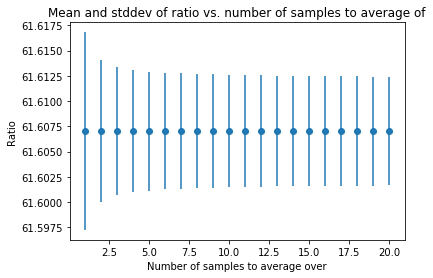

In [5]:
plt.errorbar(avg_counts[:20], means[:20], stddevs[:20], linestyle='None', marker='o')
plt.title('Mean and stddev of ratio vs. number of samples to average of')
plt.xlabel('Number of samples to average over')
plt.ylabel('Ratio')
plt.show()